In [111]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2
from haversine import haversine, Unit

In [112]:
df = pd.read_csv('../data/raw/final_df_ayman.csv')

In [113]:
stations_url = "https://data.cityofnewyork.us/resource/hc8x-tcnd.json?$limit=60000"
stations_raw = requests.get(stations_url).json()
stations = pd.DataFrame(stations_raw)

In [114]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   facilityname       219 non-null    object
 1   facilityaddress    219 non-null    object
 2   borough            219 non-null    object
 3   postcode           219 non-null    object
 4   latitude           219 non-null    object
 5   longitude          219 non-null    object
 6   community_board    219 non-null    object
 7   community_council  219 non-null    object
 8   census_tract       219 non-null    object
 9   bin                219 non-null    object
 10  bbl                219 non-null    object
 11  nta                219 non-null    object
dtypes: object(12)
memory usage: 20.7+ KB


# ok step back here i have latitude and longitude on where the station is and the zip code on where the call was

In [115]:
zipcode = df['zipcode'].unique()
print(zipcode)
# the list of zip codes plus the null

[10128 11221 10463 10018 10034 11205 10002 10012 10301 11224 10457 11239
     0 11102 11214 11368 10461 10027 11379 10019 11434 10460 10036 10451
 11201 11233 10017 11236 10458 10033 10467 11209 11218 10010 11206 10312
 10022 11208 10037 11216 10001 11237 10032 10472 11238 10454 11210 10009
 11225 10306 11249 11372 10003 11377 10016 10028 10031 10456 11691 10035
 10014 10025 10029 10453 11220 10039 10307 10455 10305 11229 10462 10308
 11369 11435 11235 10026 10065 10024 10468 10023 10475 11207 10452 11226
 11432 11217 11211 10465 11420 10020 11234 11232 11215 11374 11361 10013
 11419 10038 11212 10004 11375 11364 11421 11230 10011 11428 11416 11385
 11373 11222 10304 11223 10040 11219 11203 10030 11412 10459 11378 11231
 10469 10466 11367 11354 11436 10021 10474 10075 10309 11418 10473 10006
 11417 11103 10470 10314 11415 11104 11426 11213 11106 10169 10471 11427
 11414 11433 11356 11692 11422 11204 11105 11429 10303 11370 11358 11694
 11411 11228 10121 11413 10282 11101 11365 11693 10

In [116]:
places = merged_df['borough'].unique()
print(places)

['MANHATTAN' 'BROOKLYN' 'BRONX' 'RICHMOND / STATEN ISLAND' 'QUEENS']


manually covert zipcodes to find lat and long

In [117]:
#new york zipcode coordinates looked up by  
nyc_zipcode = {
    # Manhattan
    10001: (40.7506, -73.9971), 10002: (40.7156, -73.9862), 10003: (40.7318, -73.9885),
    10004: (40.7048, -74.0133), 10005: (40.7061, -74.0087), 10006: (40.7090, -74.0130),
    10007: (40.7134, -74.0075), 10009: (40.7264, -73.9783), 10010: (40.7393, -73.9817),
    10011: (40.7405, -74.0015), 10012: (40.7255, -73.9983), 10013: (40.7199, -74.0048),
    10014: (40.7341, -74.0065), 10016: (40.7458, -73.9784), 10017: (40.7520, -73.9733),
    10018: (40.7553, -73.9933), 10019: (40.7655, -73.9879), 10020: (40.7586, -73.9787),
    10021: (40.7691, -73.9589), 10022: (40.7577, -73.9691), 10023: (40.7765, -73.9815),
    10024: (40.7914, -73.9743), 10025: (40.7981, -73.9654), 10026: (40.8023, -73.9524),
    10027: (40.8116, -73.9534), 10028: (40.7763, -73.9533), 10029: (40.7917, -73.9438),
    10030: (40.8182, -73.9431), 10031: (40.8249, -73.9497), 10032: (40.8382, -73.9426),
    10033: (40.8500, -73.9343), 10034: (40.8670, -73.9238), 10035: (40.7957, -73.9297),
    10036: (40.7590, -73.9899), 10037: (40.8132, -73.9372), 10038: (40.7093, -74.0026),
    10039: (40.8264, -73.9363), 10040: (40.8583, -73.9301), 10044: (40.7615, -73.9502),
    10065: (40.7644, -73.9635), 10075: (40.7710, -73.9565), 10121: (40.7114, -74.0098),
    10128: (40.7813, -73.9502), 10282: (40.7158, -74.0145),
    
    # Bronx, NY
    10451: (40.8234, -73.9251), 10452: (40.8406, -73.9184), 10453: (40.8529, -73.9121),
    10454: (40.8056, -73.9183), 10455: (40.8154, -73.9092), 10456: (40.8282, -73.9091),
    10457: (40.8469, -73.8976), 10458: (40.8623, -73.8880), 10459: (40.8263, -73.8926),
    10460: (40.8421, -73.8795), 10461: (40.8479, -73.8429), 10462: (40.8469, -73.8608),
    10463: (40.8799, -73.9067), 10464: (40.8668, -73.7951), 10465: (40.8274, -73.8221),
    10466: (40.8899, -73.8466), 10467: (40.8736, -73.8721), 10468: (40.8680, -73.8993),
    10469: (40.8687, -73.8463), 10470: (40.8896, -73.8673), 10471: (40.8985, -73.9006),
    10472: (40.8298, -73.8736), 10473: (40.8181, -73.8583), 10474: (40.8107, -73.8876),
    10475: (40.8779, -73.8250),
    
    # Brooklyn, NY
    11201: (40.6945, -73.9896), 11203: (40.6498, -73.9342), 11204: (40.6184, -73.9844),
    11205: (40.6944, -73.9665), 11206: (40.7018, -73.9424), 11207: (40.6709, -73.8943),
    11208: (40.6695, -73.8718), 11209: (40.6216, -74.0302), 11210: (40.6277, -73.9466),
    11211: (40.7127, -73.9530), 11212: (40.6627, -73.9137), 11213: (40.6710, -73.9360),
    11214: (40.5993, -73.9962), 11215: (40.6627, -73.9863), 11216: (40.6807, -73.9495),
    11217: (40.6827, -73.9795), 11218: (40.6441, -73.9759), 11219: (40.6321, -73.9965),
    11220: (40.6406, -74.0165), 11221: (40.6912, -73.9273), 11222: (40.7282, -73.9475),
    11223: (40.5971, -73.9735), 11224: (40.5771, -73.9881), 11225: (40.6631, -73.9549),
    11226: (40.6463, -73.9565), 11228: (40.6163, -74.0132), 11229: (40.6000, -73.9444),
    11230: (40.6226, -73.9655), 11231: (40.6781, -74.0053), 11232: (40.6565, -74.0084),
    11233: (40.6779, -73.9200), 11234: (40.6067, -73.9089), 11235: (40.5843, -73.9493),
    11236: (40.6396, -73.9007), 11237: (40.7042, -73.9208), 11238: (40.6789, -73.9636),
    11239: (40.6473, -73.8789), 11249: (40.7154, -73.9595),
    
    # Queens, NY
    11101: (40.7504, -73.9393), 11102: (40.7717, -73.9260), 11103: (40.7629, -73.9131),
    11104: (40.7446, -73.9207), 11105: (40.7789, -73.9065), 11106: (40.7622, -73.9308),
    11354: (40.7677, -73.8265), 11355: (40.7524, -73.8236), 11356: (40.7851, -73.8414),
    11357: (40.7867, -73.8088), 11358: (40.7605, -73.7993), 11359: (40.7922, -73.7771),
    11360: (40.7824, -73.7794), 11361: (40.7641, -73.7738), 11362: (40.7571, -73.7365),
    11363: (40.7730, -73.7708), 11364: (40.7453, -73.7629), 11365: (40.7399, -73.7949),
    11366: (40.7285, -73.7937), 11367: (40.7295, -73.8256), 11368: (40.7513, -73.8555),
    11369: (40.7636, -73.8727), 11370: (40.7644, -73.8933), 11371: (40.7735, -73.8791),
    11372: (40.7512, -73.8914), 11373: (40.7387, -73.8786), 11374: (40.7261, -73.8612),
    11375: (40.7214, -73.8447), 11377: (40.7447, -73.9052), 11378: (40.7244, -73.9094),
    11379: (40.7161, -73.8804), 11385: (40.7003, -73.8816), 11411: (40.6939, -73.7363),
    11412: (40.6987, -73.7604), 11413: (40.6721, -73.7527), 11414: (40.6595, -73.8443),
    11415: (40.7076, -73.8285), 11416: (40.6854, -73.8517), 11417: (40.6775, -73.8447),
    11418: (40.7002, -73.8309), 11419: (40.6887, -73.8215), 11420: (40.6748, -73.8314),
    11421: (40.6940, -73.8584), 11422: (40.6603, -73.7364), 11423: (40.7164, -73.7694),
    11426: (40.7363, -73.7235), 11427: (40.7285, -73.7432), 11428: (40.7199, -73.7425),
    11429: (40.7085, -73.7435), 11430: (40.6506, -73.7889), 11432: (40.7146, -73.7938),
    11433: (40.6977, -73.7869), 11434: (40.6764, -73.7757), 11435: (40.7066, -73.8091),
    11436: (40.6768, -73.7889), 11691: (40.6013, -73.7565), 11692: (40.5924, -73.7898),
    11693: (40.5976, -73.8054), 11694: (40.5783, -73.8444), 11697: (40.5847, -73.8436),
    11109: (40.7433, -73.9538),
    
    # Staten Island, NY
    10301: (40.6336, -74.0955), 10302: (40.6288, -74.1423), 10303: (40.6294, -74.1776),
    10304: (40.6050, -74.0931), 10305: (40.5992, -74.0753), 10306: (40.5675, -74.1357),
    10307: (40.5070, -74.2426), 10308: (40.5554, -74.1510), 10309: (40.5330, -74.2213),
    10310: (40.6331, -74.1157), 10312: (40.5448, -74.1792), 10314: (40.5993, -74.1656),
    
    # Nassau (border areas)
    11001: (40.7371, -73.7117), 11004: (40.7453, -73.7116), 11005: (40.7528, -73.7197),
    11040: (40.7442, -73.7705),}


zipcode_df = pd.DataFrame([{'zipcode': int(z), 'latitude_of_call': lat, 'longitude_of_call': lon} for z, (lat, lon) in nyc_zipcode.items()])


In [118]:
zipcode_df

,zipcode,latitude_of_call,longitude_of_call
0,10001,40.7506,-73.9971
1,10002,40.7156,-73.9862
2,10003,40.7318,-73.9885
3,10004,40.7048,-74.0133
4,10005,40.7061,-74.0087
...,...,...,...
179,10314,40.5993,-74.1656
180,11001,40.7371,-73.7117
181,11004,40.7453,-73.7116
182,11005,40.7528,-73.7197


In [119]:
main_df = df.merge(zipcode_df, on='zipcode', how='left')

In [120]:
main_df.columns

Index(['datetime', 'initial_type', 'initial_severity', 'final_type',
       'final_severity', 'dispatch_response_sec', 'incident_response_sec',
       'travel_time_sec', 'held', 'borough', 'dispatch_area', 'zipcode',
       'precinct', 'council_district', 'community_district', 'reopened',
       'special_events', 'standby', 'transferred', 'year', 'month', 'day',
       'week_day', 'hour', 'temperture', 'precipitation', 'windspeed',
       'weathercode', 'is_weekend', 'is_rush_hour', 'time_of_day', 'season',
       'is_holiday', 'latitude_of_call', 'longitude_of_call'],
      dtype='object')

In [121]:
main_df

,datetime,initial_type,initial_severity,final_type,final_severity,dispatch_response_sec,incident_response_sec,travel_time_sec,held,borough,...,precipitation,windspeed,weathercode,is_weekend,is_rush_hour,time_of_day,season,is_holiday,latitude_of_call,longitude_of_call
0,2023-01-01 00:00:02,UNKNOW,4,UNKNOW,4,1410,1887.0,477.0,N,MANHATTAN,...,0.4,11.3,51,1,0,night,winter,0,40.7813,-73.9502
1,2023-01-01 00:00:16,RESPFC,4,RESPFC,4,66,7365.0,7299.0,Y,BROOKLYN,...,0.4,11.3,51,1,0,night,winter,0,40.6912,-73.9273
2,2023-01-01 00:00:30,DIFFFC,2,DIFFFC,2,114,479.0,365.0,N,BRONX,...,0.4,11.3,51,1,0,night,winter,0,40.8799,-73.9067
3,2023-01-01 00:01:35,INJURY,5,INJURY,5,3725,3725.0,0.0,N,MANHATTAN,...,0.4,11.3,51,1,0,night,winter,0,40.7553,-73.9933
4,2023-01-01 00:01:55,DRUG,4,DRUG,4,1307,2108.0,801.0,Y,MANHATTAN,...,0.4,11.3,51,1,0,night,winter,0,40.8670,-73.9238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2023-01-14 18:13:18,UNKNOW,4,UNKNOW,4,18,285.0,267.0,N,BROOKLYN,...,0.0,23.7,3,1,1,evening,winter,0,40.6695,-73.8718
59996,2023-01-14 18:13:31,EDP,7,EDP,7,21,537.0,516.0,N,MANHATTAN,...,0.0,23.7,3,1,1,evening,winter,0,40.7134,-74.0075
59997,2023-01-14 18:13:54,UNKNOW,4,UNKNOW,4,78,636.0,558.0,N,BROOKLYN,...,0.0,23.7,3,1,1,evening,winter,0,40.6627,-73.9137
59998,2023-01-14 18:13:59,SICK,6,SICK,6,13,158.0,145.0,N,RICHMOND / STATEN ISLAND,...,0.0,23.7,3,1,1,evening,winter,0,40.6050,-74.0931


In [122]:
stations.columns

Index(['facilityname', 'facilityaddress', 'borough', 'postcode', 'latitude',
       'longitude', 'community_board', 'community_council', 'census_tract',
       'bin', 'bbl', 'nta'],
      dtype='object')

# The secret formula for distance

# the numpy way

In [ ]:
# example from internet 
import numpy as np
from math import radians

def manhattan_distance_miles(lat1, lon1, lat2, lon2):
    """
    Calculate the Manhattan distance between two geographic points in miles.

    Args:
        lat1 (float): Latitude of point 1.
        lon1 (float): Longitude of point 1.
        lat2 (float): Latitude of point 2.
        lon2 (float): Longitude of point 2.

    Returns:
        float: The Manhattan distance in miles.
    """
    # Earth's radius in miles
    R = 3958.8

    # Convert degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Calculate differences
    d_lat = lat2_rad - lat1_rad
    d_lon = lon2_rad - lon1_rad

    # Calculate the latitude distance
    # We use a simplified Haversine for just the latitude difference
    a_lat = np.sin(d_lat / 2.0)**2
    c_lat = 2 * np.arctan2(np.sqrt(a_lat), np.sqrt(1 - a_lat))
    distance_lat = R * c_lat

    # Calculate the longitude distance
    # We use a simplified Haversine for just the longitude difference,
    # considering the change in curvature by using the average of the two latitudes' cosines
    a_lon = np.sin(d_lon / 2.0)**2
    c_lon = 2 * np.arctan2(np.sqrt(a_lon), np.sqrt(1 - a_lon))
    distance_lon = R * c_lon * np.cos((lat1_rad + lat2_rad) / 2.0) # Adjust for longitude convergence

    # Manhattan distance is the sum of absolute latitude and longitude distances
    manhattan_dist = abs(distance_lat) + abs(distance_lon)

    return manhattan_dist

# Example Usage:
# Coordinates for Empire State Building, NYC (approx) and a point in New Jersey (approx)
# lat1, lon1 = 40.748817, -73.985428 
# lat2, lon2 = 40.712776, -74.005974 
# distance = manhattan_distance_miles(lat1, lon1, lat2, lon2)
# print(f"Manhattan Distance: {distance:.2f} miles")



# signifier on which 
# i need distance and who the responders where 
# model needs whos responding and how far they were

#Point 1 = [latitude_of_call, longitude_of_call]  the location of the EMS call

#Point 2 = [latitude, longitude]  the location of one station

In [124]:
main_df.columns

Index(['datetime', 'initial_type', 'initial_severity', 'final_type',
       'final_severity', 'dispatch_response_sec', 'incident_response_sec',
       'travel_time_sec', 'held', 'borough', 'dispatch_area', 'zipcode',
       'precinct', 'council_district', 'community_district', 'reopened',
       'special_events', 'standby', 'transferred', 'year', 'month', 'day',
       'week_day', 'hour', 'temperture', 'precipitation', 'windspeed',
       'weathercode', 'is_weekend', 'is_rush_hour', 'time_of_day', 'season',
       'is_holiday', 'latitude_of_call', 'longitude_of_call'],
      dtype='object')

In [125]:
def manhattan_distance(point1, point2):
    lat1, long1 = point1
    lat2, long2 = point2

    miles_per_lat = 69
    miles_per_long = 52

    distance = abs(lat1 - lat2)* miles_per_lat + abs(long1 - long2)* miles_per_long
    return distance

call_lats = main_df['latitude_of_call'].values
call_long = main_df['longitude_of_call'].values

call_point = [40.7128, -74.0060]   # test
station_point = [40.7306, -73.9352]  # test

distance_miles = manhattan_distance(call_point, station_point)
print(f"Manhattan distance: {distance_miles:.2f} miles")

Manhattan distance: 4.91 miles


In [134]:
def manhattan_distance(point1, point2):
    lat1, long1 = point1
    lat2, long2 = point2

    miles_per_lat = 69
    miles_per_long = 52

    distance = abs(lat1 - lat2)* miles_per_lat + abs(long1 - long2)* miles_per_long
    return distance
# the calls
call_lats = main_df['latitude_of_call'].values
call_lons = main_df['longitude_of_call'].values

# the station
station_lats = stations['latitude'].values
station_lons = stations['longitude'].values
station_name = stations['facilityname'].values

# got an error changed coordinates to floats
main_df["latitude_of_call"] = main_df["latitude_of_call"].astype(float)
main_df["longitude_of_call"] = main_df["longitude_of_call"].astype(float)

stations["latitude"] = stations["latitude"].astype(float)
stations["longitude"] = stations["longitude"].astype(float)

# let the formula do its thing
#distance = np.abs(call_lats[:, None] - station_lat[None, :]) *69+ np.abs(call_long[:, None] - station_long[None, :])*52
distance = np.abs(call_lats[:, None] - station_lats[None, :]) * 69 + \
           np.abs(call_lons[:, None] - station_lons[None, :]) * 52

closest_idx = np.argmin(distance, axis=1)


In [135]:
# adding closest station into main_df
main_df['closest_station_name'] = station_name[closest_idx]

main_df["closest_station_manhattan_miles"] = distance[np.arange(len(main_df)), closest_idx]

Converts all lat/lon to floats to avoid TypeErrors.


Computes Manhattan distances from each call to all stations.


Finds the closest station for each call.


Adds both closest station name and Manhattan distance in miles to main_df.


Merges full station info (name of faciliy , and distance) into main_df.


Fully vectorized — no loops, works for thousands of calls.

In [145]:
main_df.head(3)

,datetime,initial_type,initial_severity,final_type,final_severity,dispatch_response_sec,incident_response_sec,travel_time_sec,held,borough,...,weathercode,is_weekend,is_rush_hour,time_of_day,season,is_holiday,latitude_of_call,longitude_of_call,closest_station_name,closest_station_manhattan_miles
0,2023-01-01 00:00:02,UNKNOW,4,UNKNOW,4,1410,1887.0,477.0,N,MANHATTAN,...,51,1,0,night,winter,0,40.7813,-73.9502,Battalion 10/Engine 22/Ladder 13,0.450554
1,2023-01-01 00:00:16,RESPFC,4,RESPFC,4,66,7365.0,7299.0,Y,BROOKLYN,...,51,1,0,night,winter,0,40.6912,-73.9273,Battalion 37/Engine 222,0.260105
2,2023-01-01 00:00:30,DIFFFC,2,DIFFFC,2,114,479.0,365.0,N,BRONX,...,51,1,0,night,winter,0,40.8799,-73.9067,Engine 81/Ladder 46,0.361507


In [141]:
most_miles = main_df['closest_station_manhattan_miles'].max()
print(most_miles)

2.005654000000206


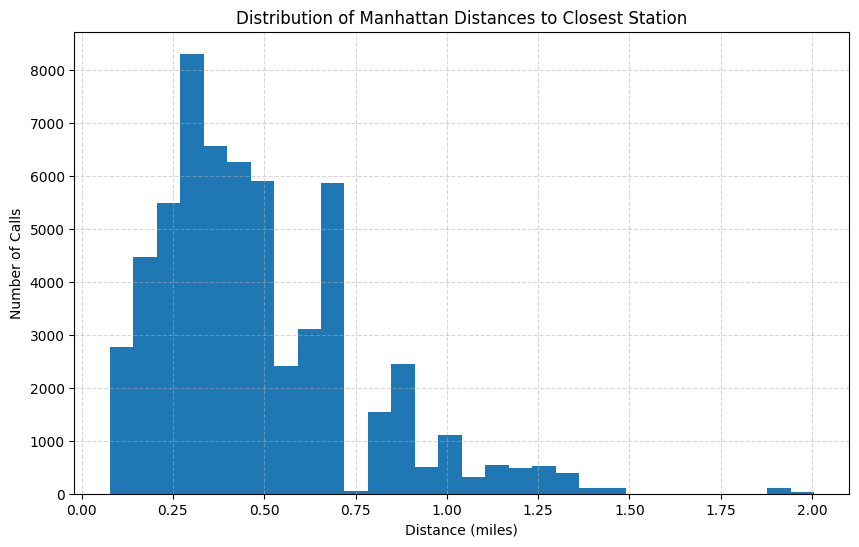

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(main_df["closest_station_manhattan_miles"], bins=30)
plt.title("Distribution of Manhattan Distances to Closest Station")
plt.xlabel("Distance (miles)")
plt.ylabel("Number of Calls")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#abs(lat1-lat2)*69 + abs(lon1-lon2)*52)


In [ ]:
from math import radians, sin, cos, sqrt, atan2

def haversine_miles(lat1, lon1, lat2, lon2):
    R = 3958.8 # Earth radius in miles
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Compare Manhattan vs Haversine distances for a few calls
sample_distances = [haversine_miles(main_df.iloc[i]['latitude_of_call'],
                                    main_df.iloc[i]['longitude_of_call'],
                                    stations.iloc[closest_idx[i]]['latitude'],
                                    stations.iloc[closest_idx[i]]['longitude'])
                    for i in range(10)]

sample_distances


[0.3251822080762198,
 0.18686925246149416,
 0.2583795159578764,
 0.18848340840836125,
 0.16161354280764112,
 0.3583357422722179,
 0.13240214324131666,
 0.13240214324131666,
 0.1934345693082574,
 0.491827800597579]

In [147]:
main_df.columns

Index(['datetime', 'initial_type', 'initial_severity', 'final_type',
       'final_severity', 'dispatch_response_sec', 'incident_response_sec',
       'travel_time_sec', 'held', 'borough', 'dispatch_area', 'zipcode',
       'precinct', 'council_district', 'community_district', 'reopened',
       'special_events', 'standby', 'transferred', 'year', 'month', 'day',
       'week_day', 'hour', 'temperture', 'precipitation', 'windspeed',
       'weathercode', 'is_weekend', 'is_rush_hour', 'time_of_day', 'season',
       'is_holiday', 'latitude_of_call', 'longitude_of_call',
       'closest_station_name', 'closest_station_manhattan_miles'],
      dtype='object')

In [158]:
main_df['incident_response_sec'].value_counts(normalize=True)


incident_response_sec
0.0        0.007427
434.0      0.002092
404.0      0.002040
344.0      0.002022
368.0      0.002022
             ...   
9114.0     0.000017
5546.0     0.000017
3207.0     0.000017
20796.0    0.000017
25995.0    0.000017
Name: proportion, Length: 3756, dtype: float64

In [ ]:

#main_df.to_csv(r"C:\Users\ayman\Documents\Github\practice_final\src\main_df.csv", index=False)


In [ ]:
#station_info_cols = ["facilityname", "facilityaddress", "borough", "postcode", "latitude", "longitude"]
#main_df = main_df.merge(
#    stations[station_info_cols],
#    left_on="closest_station_name",
#    right_on="facilityname",
#    how="left",
#    suffixes=("", "_station"))

In [ ]:
# Add the feature engineering notebook
#git add src/feature_engineering.ipynb

# Commit with a descriptive message
#git commit -m "Add fire station distance calculations"

# Push to GitHub
#git push origin main